## Name: 張宸愷
## ID: 0710018

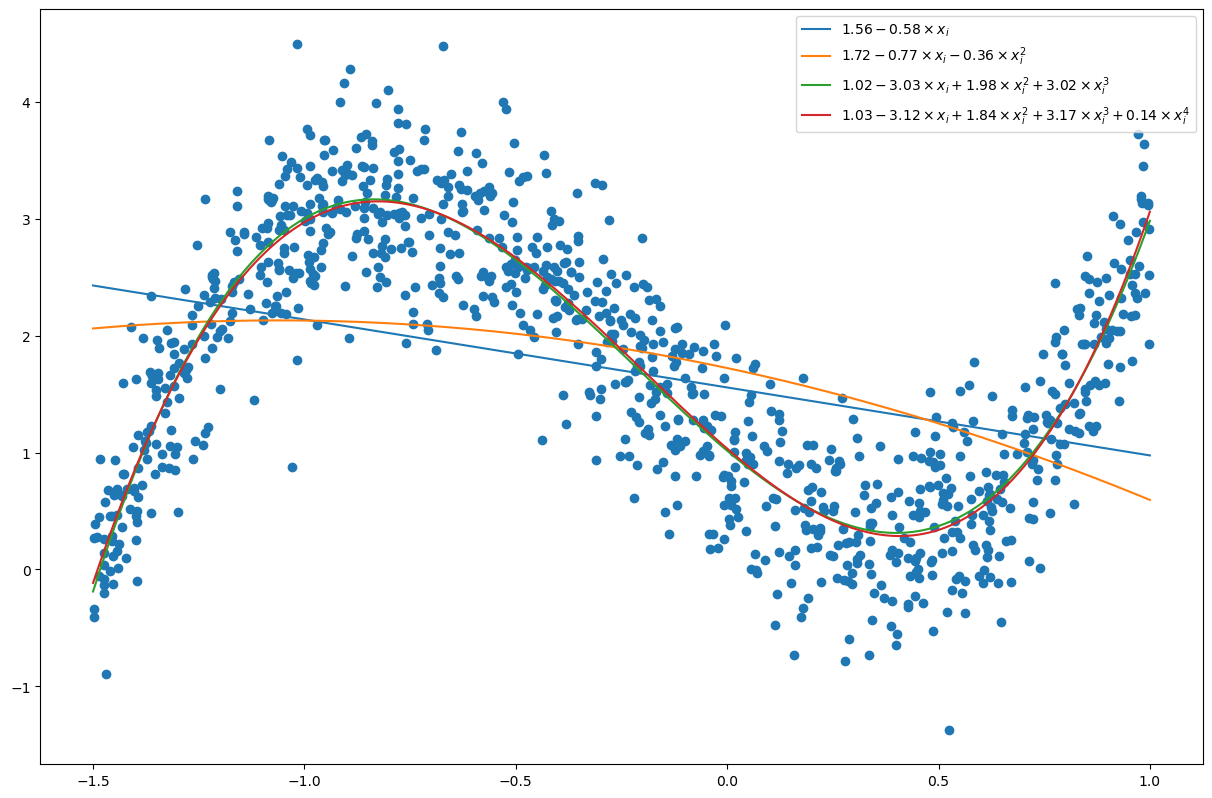

In [67]:
# Linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# data generation
Xs = np.random.uniform(-1.5, 1, size=1000)
noise = np.random.normal(0, 0.5, size=Xs.shape)
Ys = 3 * Xs**3 + 2 * Xs**2 - 3 * Xs + 1 + noise

f = plt.figure(figsize=(15, 10), dpi=100)
_ = plt.scatter(Xs, Ys) # scatter plot the uniform x and y with noise

for k in range(1, 5):
    pof = PolynomialFeatures(degree=k)

    trans = pof.fit_transform(np.expand_dims(Xs, axis=1)) # get the powers of x_i
    # print(trans)

    lr = LinearRegression()
    lr.fit(trans, Ys)

    coef = lr.coef_.T
    coef[0] = lr.intercept_ # replace the intercept in coef

    line = np.expand_dims(np.linspace(-1.5, 1, 1000), axis=1)
    trans = pof.fit_transform(line) # get the powers of linspace x for plotting the lines
    # print(coef)
    y = np.matmul(trans, coef) # get the y used for plotting
    lab = "${:.2f}".format(coef[0]) # latex magic start
    for i in range(1, k+1):
        c = coef[i]
        lab += ("+" if c >= 0 else "") + "{:.2f} \\times ".format(c) + ("x_i" if i==1 else "x^{}_i".format(i)) # some latex magic
    # print(y)
    lab += "$" # the magic latex end
    _ = plt.plot(line, y, label=lab)
_ = plt.legend() # show legend



[[5.19467622 5.28688674]]
[-5.18451229]


$$\\int$$

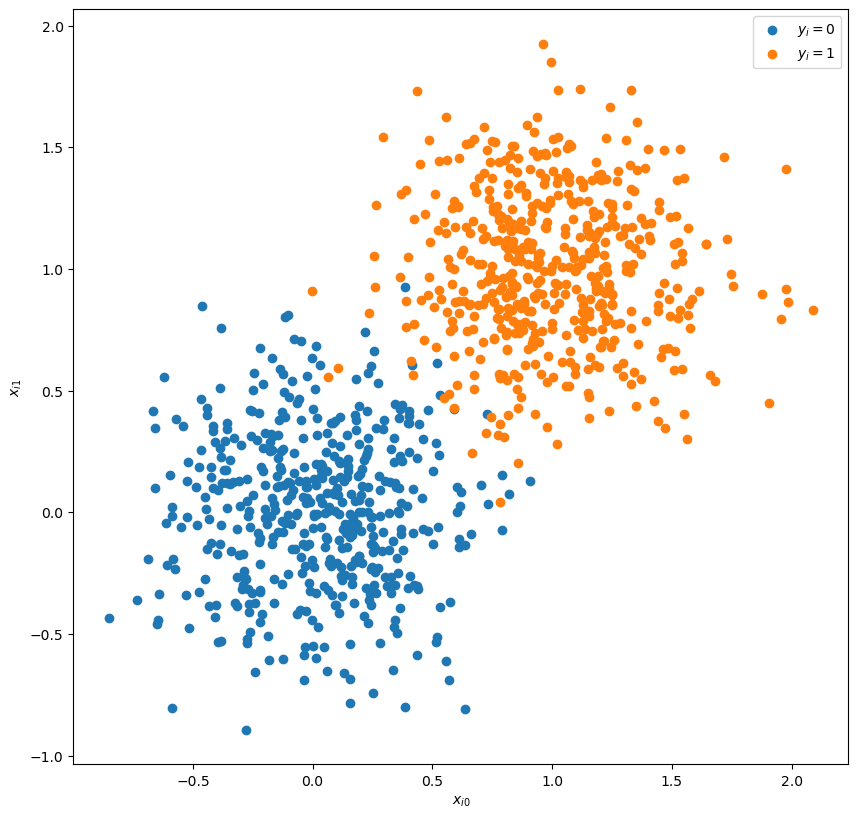

In [116]:
# logistics regression

import numpy as np
from matplotlib import pyplot as pyplot
from sklearn.linear_model import LogisticRegression
import math
from IPython.display import display, Markdown

Ys = np.random.randint(0, 2, size=1000)
# print(Ys)
Xs = np.zeros((1000, 2), dtype=np.float64)
Xs[:, 0] = np.random.normal(scale=math.sqrt(0.1), size=Xs.shape[0])
Xs[:, 1] = np.random.normal(scale=math.sqrt(0.1), size=Xs.shape[0])

Xs = Xs + np.expand_dims(Ys, axis=1)
# print(Xs)

lreg = LogisticRegression()
lreg.fit(Xs, Ys)
coef = lreg.coef_
# coef[0] = lreg.intercept_
print(coef)
print(lreg.intercept_)


y_pred = lreg.predict(Xs)
# print(y_pred)
# y_pred = 1/(1+np.exp(-(lreg.intercept_ + Xs[:,0] * coef[0,0] + Xs[:,1] * coef[0,1])))
# print(y_pred)

_ = plt.figure(figsize=(10, 10), dpi=100)
ones = np.argwhere(Ys == 1)
zeros = np.argwhere(Ys == 0)
_ = plt.scatter(Xs[zeros, 0], Xs[zeros, 1], label="$y_i=0$")
_ = plt.scatter(Xs[ones, 0], Xs[ones, 1], label="$y_i=1$")
line = np.linspace(-1, 2, 100)


plt.xlabel("$x_{{i0}}$")
plt.ylabel("$x_{{i1}}$")
_ = plt.legend()
